In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from skimage.feature import hog
from tqdm import tqdm

data_dir = "/content/drive/MyDrive/Lung Disease Dataset"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
classes = ["Bacterial Pneumonia", "Corona Virus Disease", "Normal", "Tuberculosis", "Viral Pneumonia"]


def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        return None
    image = cv2.equalizeHist(image)
    image = cv2.resize(image, (128, 128))
    return image


def extract_hog_features(image):
    features, _ = hog(image, orientations=9, pixels_per_cell=(8, 8),
                      cells_per_block=(2, 2), visualize=True)
    return features


def load_dataset(directory):
    data = []
    labels = []
    for label, category in enumerate(classes):
        class_path = os.path.join(directory, category)
        if not os.path.exists(class_path):
            print(f"Warning: {class_path} does not exist. Skipping...")
            continue
        for file in tqdm(os.listdir(class_path), desc=f"Processing {category}"):
            image_path = os.path.join(class_path, file)
            image = preprocess_image(image_path)
            if image is None:
                continue
            features = extract_hog_features(image)
            data.append(features)
            labels.append(label)
    return np.array(data), np.array(labels)

X_train, y_train = load_dataset(train_dir)
X_test, y_test = load_dataset(test_dir)

Processing Viral Pneumonia: 100%|██████████| 403/403 [00:30<00:00, 13.09it/s]


In [4]:
models = {
    "SVM (Linear)": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF)": SVC(kernel='rbf', probability=True),
}


model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n{name} Model Performance:")
    print("Accuracy:", accuracy)
    print("Classification Report:")


    report = classification_report(y_test, y_pred, target_names=classes, output_dict=False)
    print(report)

    model_results.append({
        "Model": name,
        "Accuracy (%)": round(accuracy * 100, 2)
    })


results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values(by="Accuracy (%)", ascending=False).reset_index(drop=True)


print("\n" + "="*40)
print(" MODEL ACCURACY TABLE ")
print("="*40)
print(results_df.to_string(index=False))
print("="*40)


best_model = results_df.iloc[0]
print(f"\n Best Performing Model: {best_model['Model']}")
print(f" Justification: It achieved the highest accuracy of {best_model['Accuracy (%)']}%, "
      "making it the most reliable model for lung disease detection.")


def predict_disease(image_path, model):
    image = preprocess_image(image_path)
    if image is None:
        return "Error: Invalid image path or unreadable file."
    features = extract_hog_features(image).reshape(1, -1)
    prediction = model.predict(features)[0]
    return classes[prediction]


SVM (Linear) Model Performance:
Accuracy: 0.7550617283950617
Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.61      0.64      0.63       403
Corona Virus Disease       0.83      0.84      0.83       407
              Normal       0.84      0.82      0.83       404
        Tuberculosis       0.91      0.89      0.90       408
     Viral Pneumonia       0.59      0.58      0.58       403

            accuracy                           0.76      2025
           macro avg       0.76      0.75      0.76      2025
        weighted avg       0.76      0.76      0.76      2025


Random Forest Model Performance:
Accuracy: 0.7249382716049383
Classification Report:
                      precision    recall  f1-score   support

 Bacterial Pneumonia       0.65      0.62      0.63       403
Corona Virus Disease       0.77      0.78      0.78       407
              Normal       0.78      0.72      0.75       404
        Tuberculosi

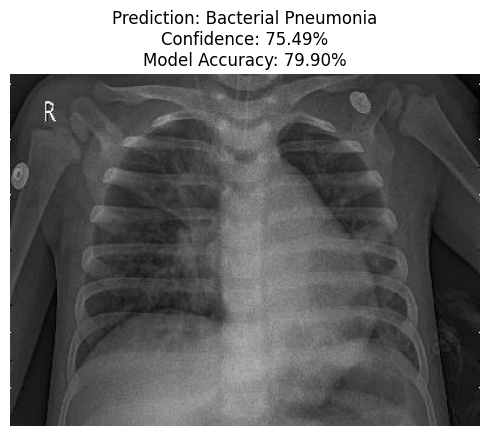

In [ ]:
image_path = "/content/118.jpeg"
selected_model = models["SVM (RBF)"]


image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100

    predicted_label = classes[prediction]


    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100


    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


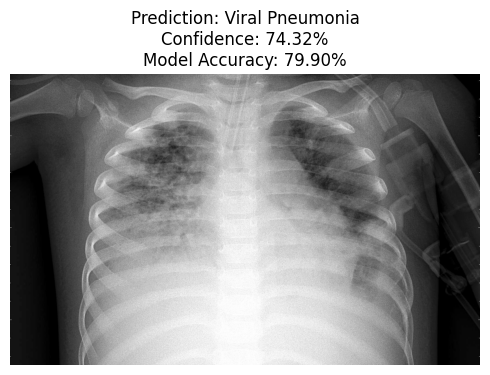

In [ ]:
image_path = "/content/020.jpeg"
selected_model = models["SVM (RBF)"]


image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100

    predicted_label = classes[prediction]


    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100


    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

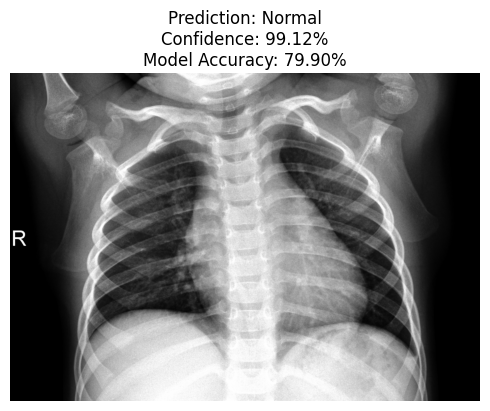

In [ ]:
image_path = "/content/0109.jpeg"
selected_model = models["SVM (RBF)"]


image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100

    predicted_label = classes[prediction]


    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100


    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

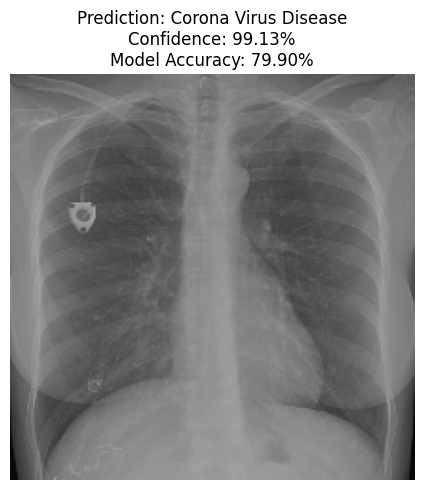

In [ ]:
image_path = "/content/00030354_001.png"
selected_model = models["SVM (RBF)"]


image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100

    predicted_label = classes[prediction]


    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100


    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

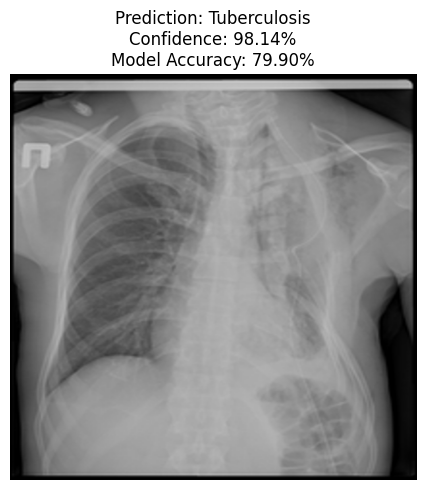

In [ ]:
image_path = "/content/Tuberculosis-106.jpg"
selected_model = models["SVM (RBF)"]


image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100

    predicted_label = classes[prediction]


    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100


    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(5, 5))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=12)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

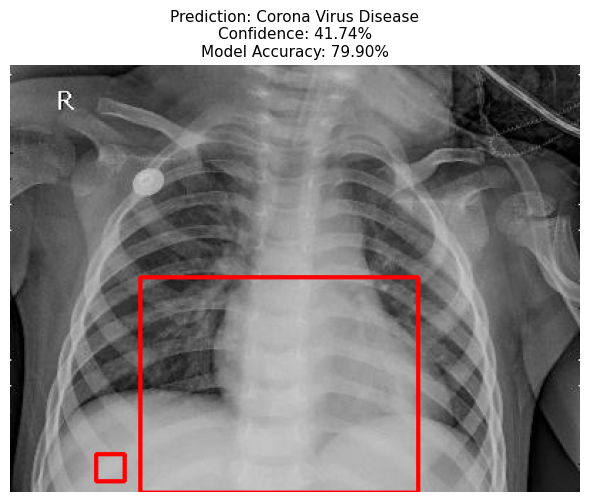

In [10]:


# Path to image and model
image_path = "/content/124.jpeg"
selected_model = models["SVM (RBF)"]

# Preprocess and predict
image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100
    predicted_label = classes[prediction]

    # Full model accuracy
    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100

    # Read original image
    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # ---- Modified Disease Region Detection ----
    gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    # Threshold to highlight suspicious regions (bright spots)
    _, thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)

    # Clean noise
    kernel = np.ones((5,5), np.uint8)
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    clean = cv2.dilate(clean, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw all suspicious regions if they are big enough
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 300:  # You can adjust this threshold
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue box

    # ---- Plot the result ----
    plt.figure(figsize=(6,6))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=11)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


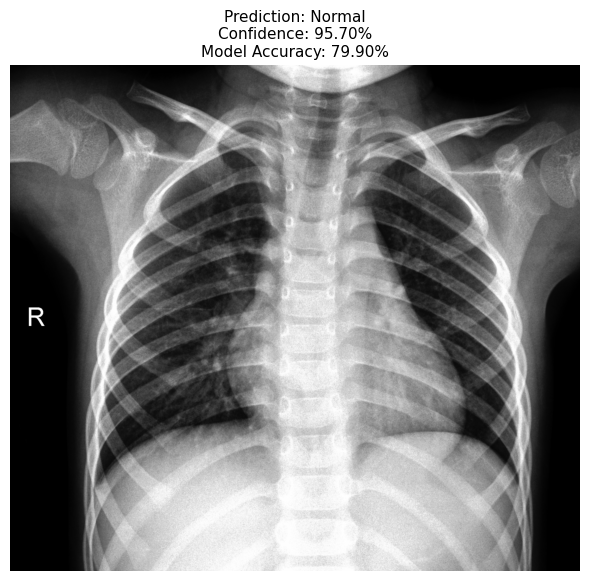

✅ Image looks normal. No disease region detected.


In [11]:

image_path = "/content/0101.jpeg"
selected_model = models["SVM (RBF)"]

# Preprocess and predict
image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100
    predicted_label = classes[prediction]

    # Full model accuracy
    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100

    # Read original image
    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # ---- Disease Region Detection ----
    draw_box = False  # Control flag for drawing box

    if predicted_label.lower() != "normal":  # Only if not normal
        gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
        blurred = cv2.GaussianBlur(gray, (5,5), 0)

        _, thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)

        # Clean noise
        kernel = np.ones((5,5), np.uint8)
        clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
        clean = cv2.dilate(clean, kernel, iterations=1)

        # Find contours
        contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        for cnt in contours:
            area = cv2.contourArea(cnt)
            if area > 300:
                x, y, w, h = cv2.boundingRect(cnt)
                cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue box
                draw_box = True

    # ---- Plot the result ----
    plt.figure(figsize=(6,6))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=11)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Message if normal
    if not draw_box and predicted_label.lower() == "normal":
        print(" Image looks normal. No disease region detected.")


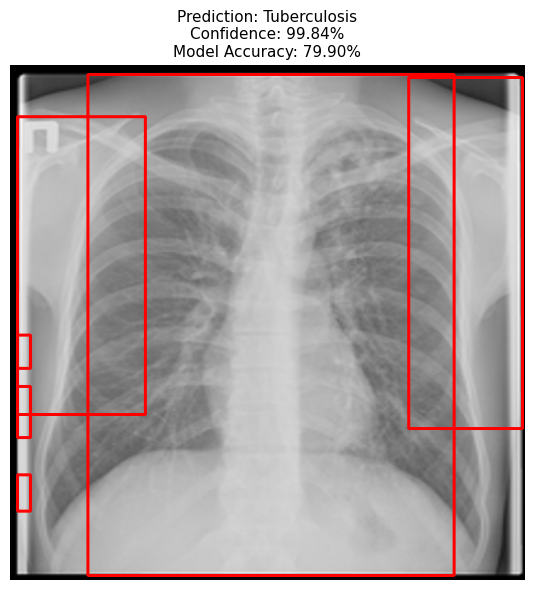

In [12]:


# Path to image and model
image_path = "/content/Tuberculosis-105.jpg"
selected_model = models["SVM (RBF)"]

# Preprocess and predict
image = preprocess_image(image_path)
if image is None:
    print("Invalid image or path!")
else:
    features = extract_hog_features(image).reshape(1, -1)
    prediction = selected_model.predict(features)[0]
    probabilities = selected_model.predict_proba(features)[0]
    confidence = np.max(probabilities) * 100
    predicted_label = classes[prediction]

    # Full model accuracy
    y_pred_all = selected_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_all) * 100

    # Read original image
    original_image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    # ---- Modified Disease Region Detection ----
    gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5,5), 0)

    # Threshold to highlight suspicious regions (bright spots)
    _, thresh = cv2.threshold(blurred, 180, 255, cv2.THRESH_BINARY)

    # Clean noise
    kernel = np.ones((5,5), np.uint8)
    clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
    clean = cv2.dilate(clean, kernel, iterations=1)

    # Find contours
    contours, _ = cv2.findContours(clean, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw all suspicious regions if they are big enough
    for cnt in contours:
        area = cv2.contourArea(cnt)
        if area > 300:  # You can adjust this threshold
            x, y, w, h = cv2.boundingRect(cnt)
            cv2.rectangle(image_rgb, (x, y), (x+w, y+h), (255, 0, 0), 2)  # Blue box

    # ---- Plot the result ----
    plt.figure(figsize=(6,6))
    plt.imshow(image_rgb)
    plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.2f}%\nModel Accuracy: {accuracy:.2f}%", fontsize=11)
    plt.axis('off')
    plt.tight_layout()
    plt.show()